In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gc


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [3]:
pd.set_option('display.max_columns', None)

# TASK 2: DATA UNDERSTANDING


In [4]:
# load the data
df = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv')
print("the shape of the data ",df.shape)
df.head()

the shape of the data  (4958347, 54)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
# Check for missing values
df.isnull().sum(axis = 0)

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

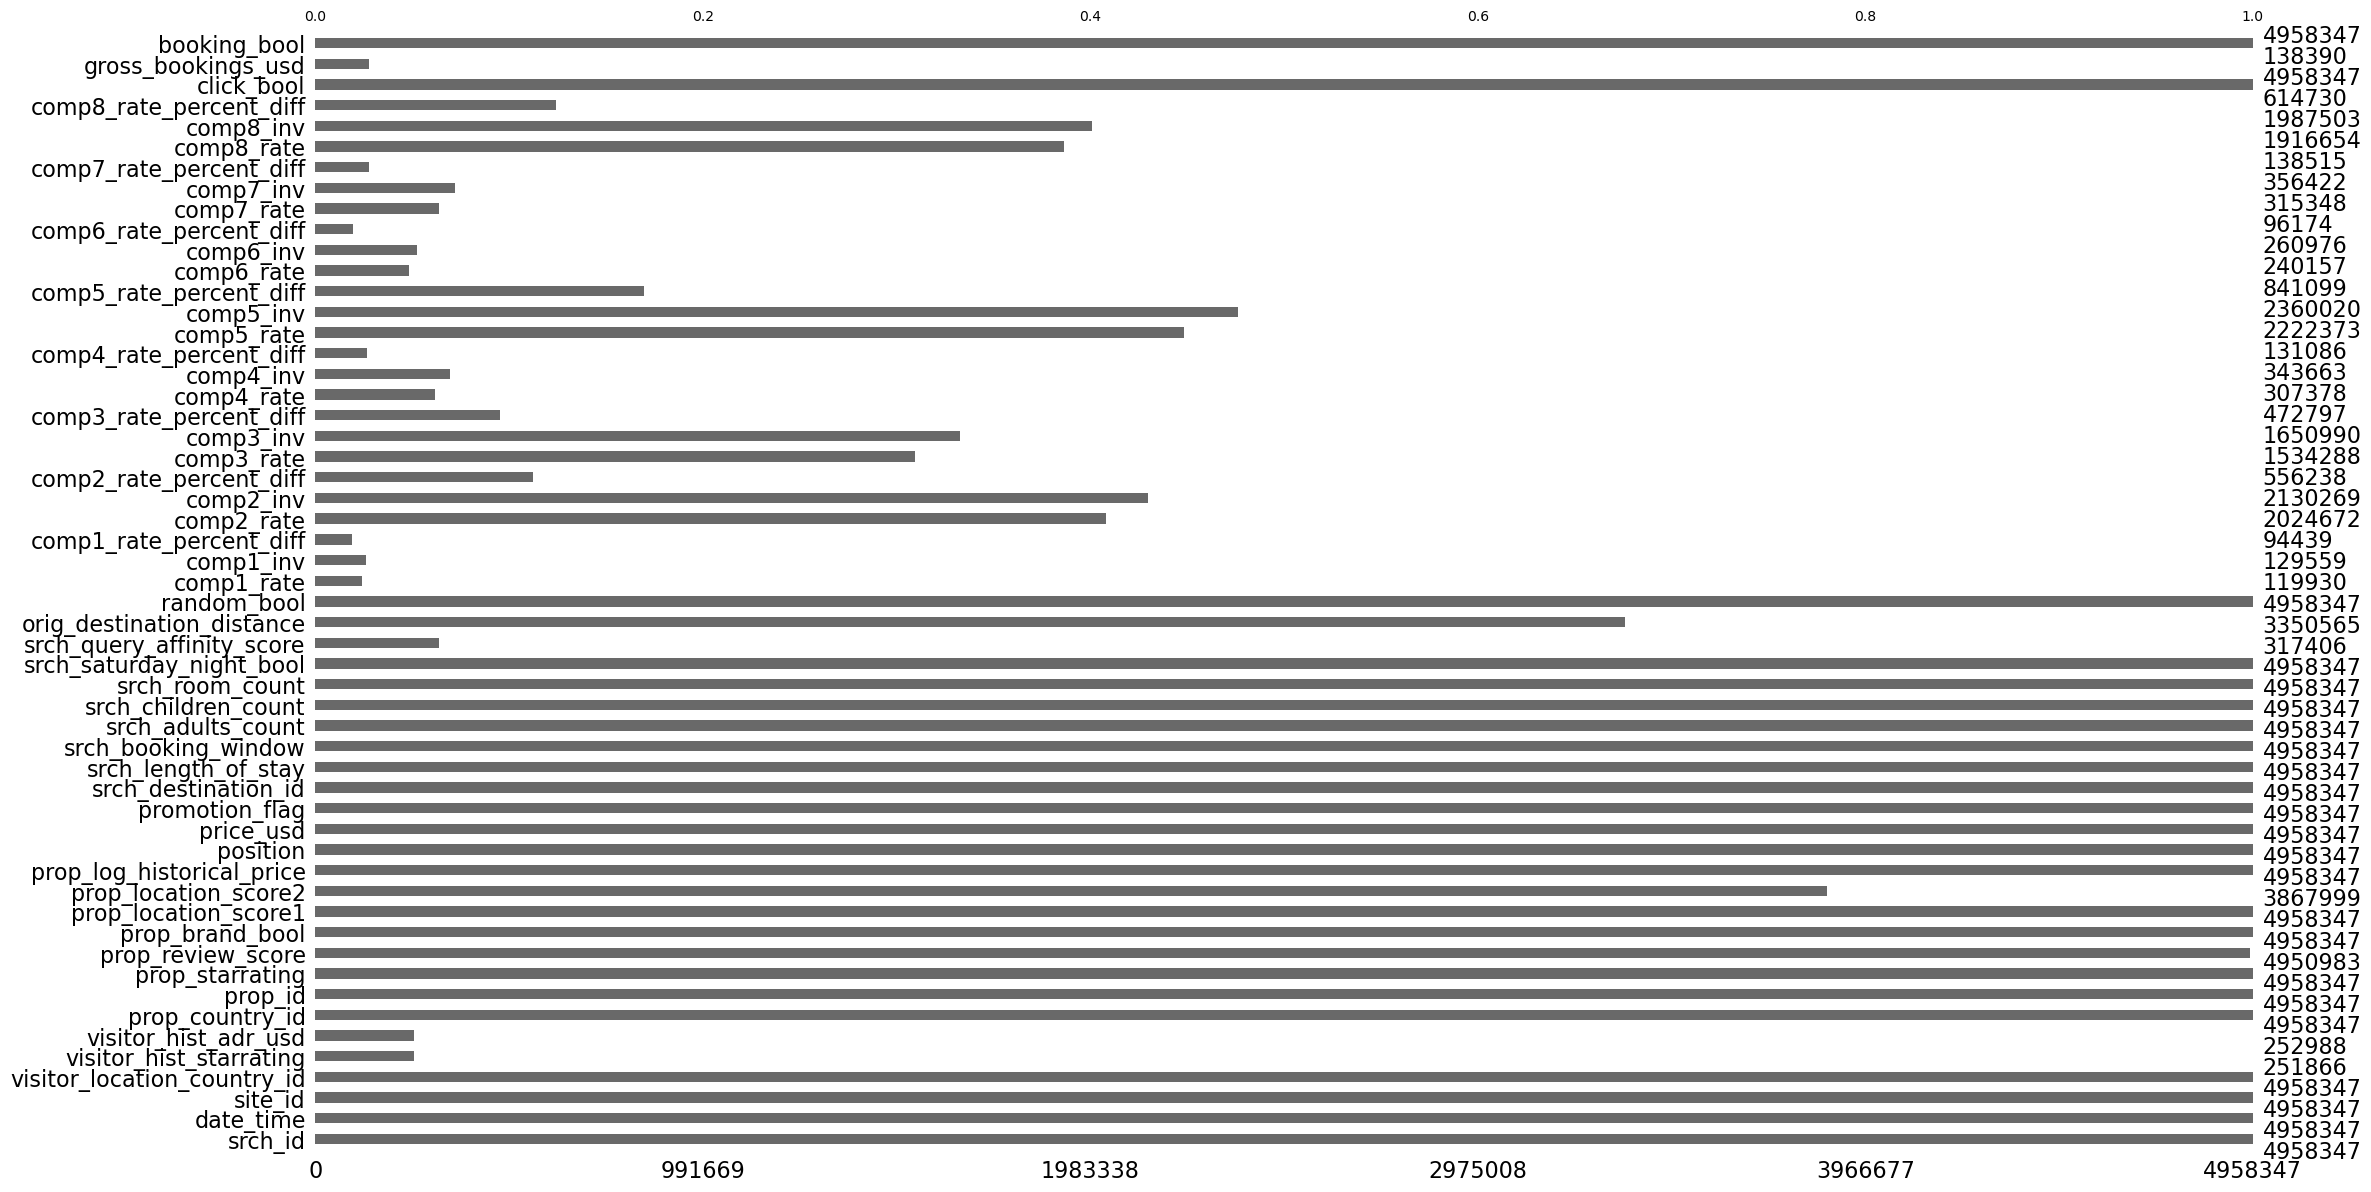

In [6]:
import missingno as msno
# visualize the missing values
msno.bar(df);

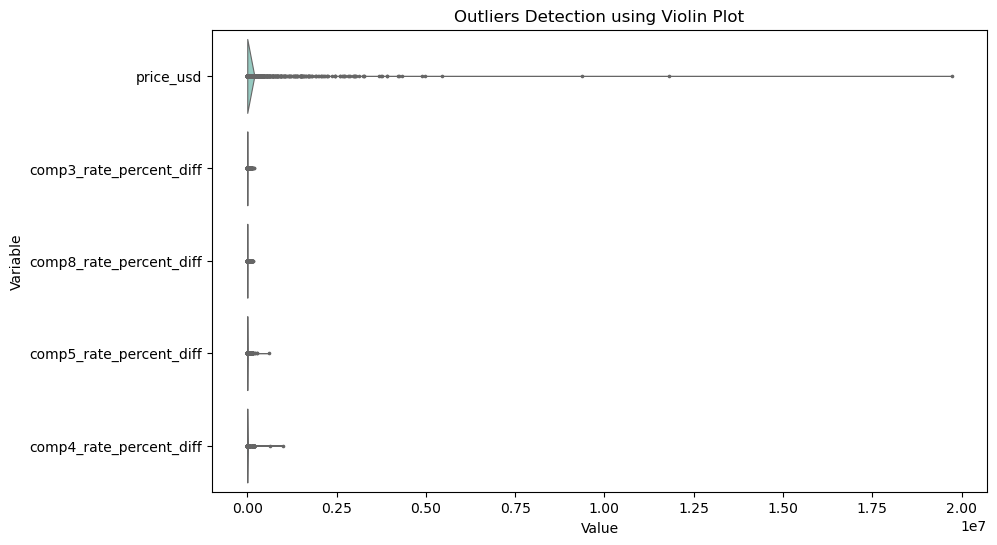

In [7]:
# Select the numeric columns for outlier detection
features = ['price_usd','comp3_rate_percent_diff',
            'comp8_rate_percent_diff','comp5_rate_percent_diff','comp4_rate_percent_diff']


# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[features], inner="points", linewidth=0.8, scale="width", palette="Set3", orient='h')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Outliers Detection using Violin Plot')

# Show the plot
plt.show()

In [8]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,317406.000000,3.350565e+06,4.958347e+06,119930.000000,129559.000000,94439.000000,2.024672e+06,2.130269e+06,556238.000000,1.534288e+06,1.650990e+06,472797.000000,307378.000000,343663.000000,1.310860e+05,2.222373e+06,2.360020e+06,841099.000000,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,2.872589e+00,1.303852e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,1.404263e+04,2.385427e+00,3.747417e+01,1.972637e+00,3.504918e-01,1.110525e+00,5.022127e-01,-24.146418,1.301234e+03,2.959004e-01,0.479788,0.031059,244.229916,4.418987e-02,3.931006e-02,18.490732,1.729010e-02,5.776897e-02,27.071559,-0.016543,0.096653,1.753165e+02,2.267621e-02,5.142880e-02,29.851903,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,1.531011e+00,1.594634e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,8.111843e+03,2.053243e+00,5.199341e+01,8.570628e-01,7.325692e-01,4.172290e-01,4.999952e-01,15.743238,2.023951e+03,4.564465e-01,0.641565,0.229688,1165.448634,4.484236e-01,2.342388e-01,240.113851,4.575808e-01,2.948202e-01,1012.919911,0.578718,0.337165,5.757740e+03,5.217575e-01,2.678363e-01,1340.262382,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.101000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-30.774775,1.398000e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,7.000000,0.000000,0.0

In [9]:
# how many unique user
print(f"Check How many unique user \n{len(df['srch_id'].unique())}\n")

# how many unique prop_id
print(f"Check How many unique prop_id \n{len(df['prop_id'].unique())}\n")

# Full rating matrix will have
print(f"Full rating matrix will have \n{len(df['prop_id'].unique())*len(df['prop_id'].unique())} elements \n")

# TODO check the number of sparsity in the data 

# Check the distribution of the booking_bool variable
print(f"Check the distribution of the booking_bool variable \n{df['booking_bool'].value_counts()}\n")

# Check the distribution of the click_bool variable
print(f"Check the distribution of the click_bool variable \n{df['click_bool'].value_counts()}\n")

# Check the distribution of the visitor_location_country_id 
print(f"Check the distribution of the visitor_location_country_id \n{df['visitor_location_country_id'].value_counts().head()}\n")

# Check the distribution of the visitor_hist_starrating 
print(f"Check the distribution of the visitor_hist_starrating \n{df['visitor_hist_starrating'].value_counts().head()}\n")

# average visitor_hist_starrating for each srch_id
print(f"average visitor_hist_starrating for each srch_id \n{df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna().head()}\n")

# average visitor_location_country_id for each srch_id
print(f"average visitor_location_country_id for each srch_id \n{df.groupby('srch_id')['visitor_location_country_id'].mean().dropna().head()}\n")


Check How many unique user 
199795

Check How many unique prop_id 
129113

Full rating matrix will have 
16670166769 elements 

Check the distribution of the booking_bool variable 
0    4819957
1     138390
Name: booking_bool, dtype: int64

Check the distribution of the click_bool variable 
0    4736468
1     221879
Name: click_bool, dtype: int64

Check the distribution of the visitor_location_country_id 
219    2892489
100     495476
55      290461
216     217385
220     174296
Name: visitor_location_country_id, dtype: int64

Check the distribution of the visitor_hist_starrating 
4.0    23416
3.0    20879
3.5    17088
2.5    10534
2.0     9157
Name: visitor_hist_starrating, dtype: int64

average visitor_hist_starrating for each srch_id 
srch_id
47     4.31
49     2.50
80     2.50
87     3.74
108    3.35
Name: visitor_hist_starrating, dtype: float64

average visitor_location_country_id for each srch_id 
srch_id
1     187.0
4     219.0
6     100.0
8     219.0
11    219.0
Name: visitor_l

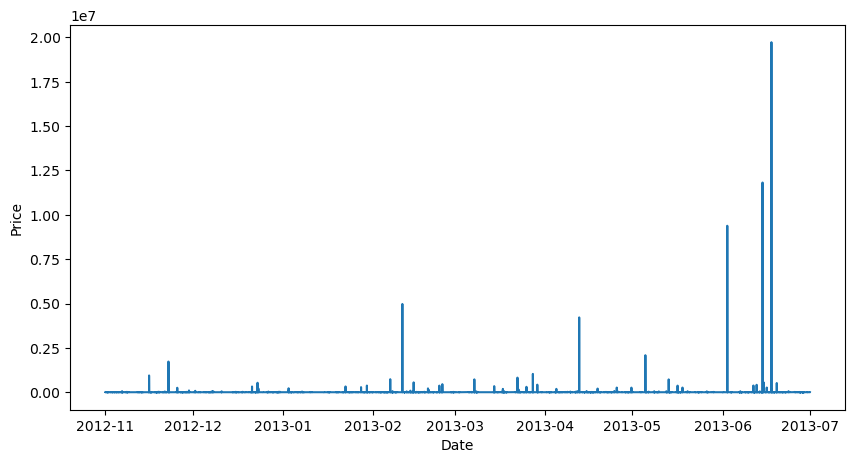

In [10]:
# plot the price against time
df['date_time'] = pd.to_datetime(df['date_time'])  # Convert 'date_time' column to datetime format
df_sorted = df.sort_values('date_time')  # Sort the DataFrame based on 'date_time'

# Plotting the sorted data
plt.figure(figsize=(10,5))
plt.plot(df_sorted['date_time'], df_sorted['price_usd'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

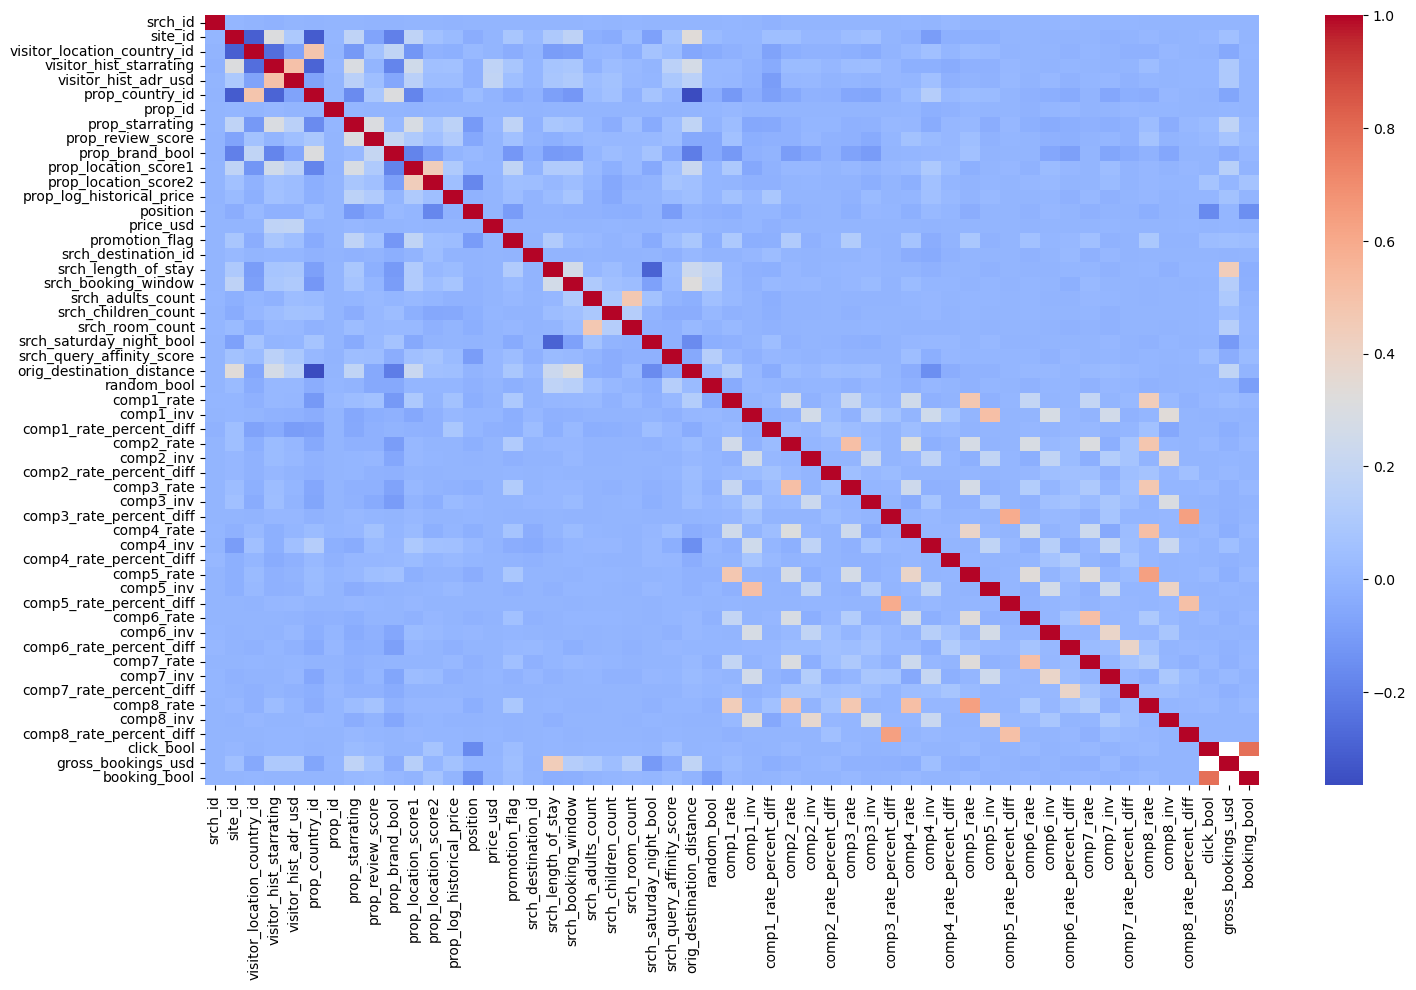

In [11]:
# Visualize the correlation between features
# Create a correlation matrix
corr = df.corr()
# Set up the plot
fig, ax = plt.subplots(figsize=(17, 10))
# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', ax=ax)
# Show the plot
plt.show()

In [12]:
# spilt the data based on click_bool
click_bool_1 = df[df['click_bool'] == 1]
click_bool_0 = df[df['click_bool'] == 0]

# spilt the data +1 when the displayed sort was random, 0 when the normal sort order was displayed
display_order = click_bool_1[click_bool_1['random_bool'] == 0]
display_random = click_bool_1[click_bool_1['random_bool'] == 1]

# spilt the data if a property is part of a brand or not  
brand_display_order = display_order[display_order['prop_brand_bool'] == 1]
not_brand_display_order = display_order[display_order['prop_brand_bool'] == 0]

brand_display_random = display_random[display_random['prop_brand_bool'] == 1]
not_brand_display_random = display_random[display_random['prop_brand_bool'] == 0]

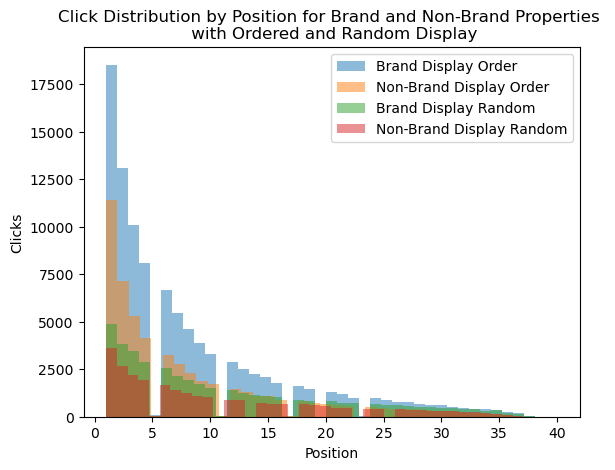

In [13]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['position'], bins=40, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['position'], bins=40, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['position'], bins=40, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['position'], bins=40, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Position')
plt.ylabel('Clicks')
plt.legend()
plt.title('Click Distribution by Position for Brand and Non-Brand Properties \n with Ordered and Random Display')

# Show the plot
plt.show()

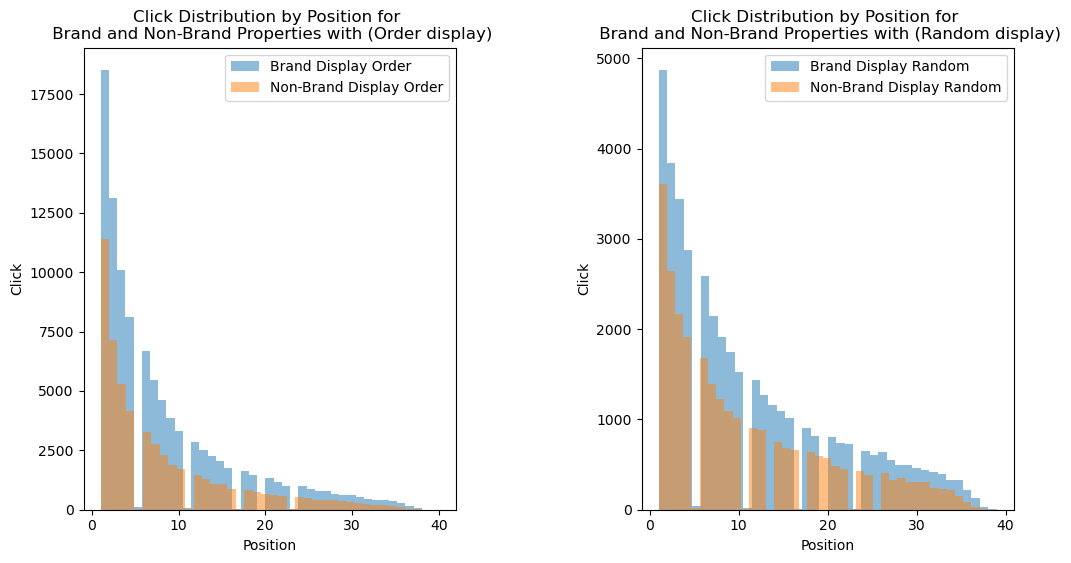

In [14]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'], bins=bins, label='Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'], bins=bins, label='Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click Distribution by Position for \n Brand and Non-Brand Properties with (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'], bins=bins, label='Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'], bins=bins, label='Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click Distribution by Position for \n Brand and Non-Brand Properties with (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


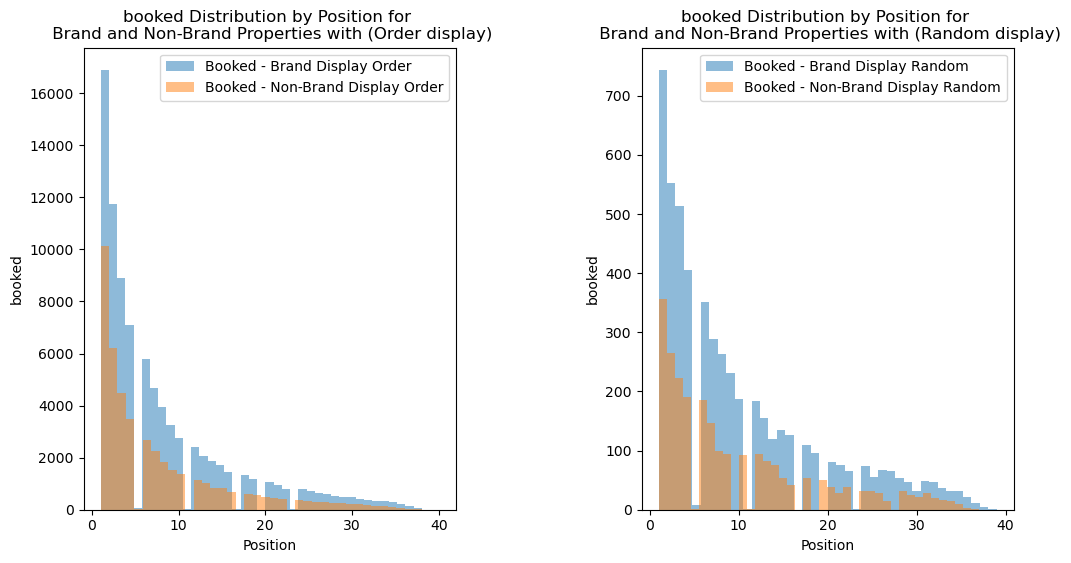

In [15]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('booked')
axes[0].set_title('booked Distribution by Position for \n Brand and Non-Brand Properties with (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('booked')
axes[1].set_title('booked Distribution by Position for \n Brand and Non-Brand Properties with (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()



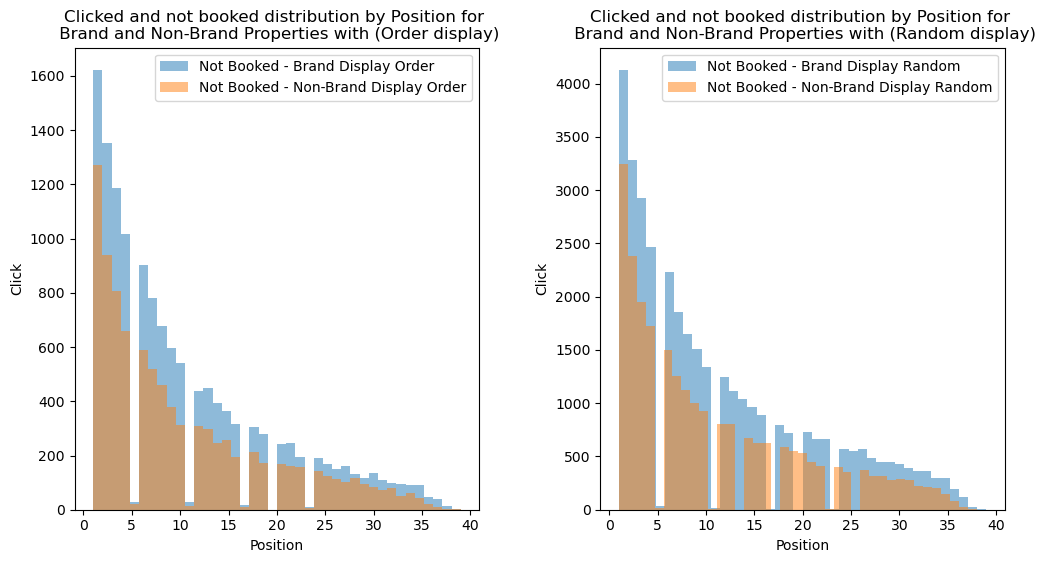

In [16]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Clicked and not booked distribution by Position for \n Brand and Non-Brand Properties with (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Clicked and not booked distribution by Position for \n Brand and Non-Brand Properties with (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

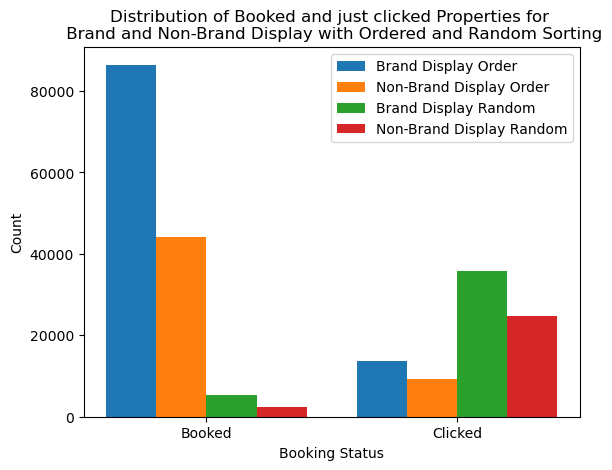

In [17]:
# Count the number of booked and not booked properties for each category
brand_display_order_counts = brand_display_order['booking_bool'].value_counts()
not_brand_display_order_counts = not_brand_display_order['booking_bool'].value_counts()
brand_display_random_counts = brand_display_random['booking_bool'].value_counts()
not_brand_display_random_counts = not_brand_display_random['booking_bool'].value_counts()

# Define the x positions for the bars
bar_width = 0.2
index = np.arange(2)

# Create a bar plot
plt.bar(index, [brand_display_order_counts[1], brand_display_order_counts[0]],width=bar_width, label='Brand Display Order')
plt.bar(index + bar_width, [not_brand_display_order_counts[1], not_brand_display_order_counts[0]],width=bar_width, label='Non-Brand Display Order')
plt.bar(index +2* bar_width,[brand_display_random_counts[1], brand_display_random_counts[0]],width=bar_width, label='Brand Display Random')
plt.bar(index +3* bar_width,[not_brand_display_random_counts[1], not_brand_display_random_counts[0]],width=bar_width, label='Non-Brand Display Random')

# Customize the plot
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(index + 1.5 * bar_width, ['Booked','Clicked'])
plt.legend()
plt.title('Distribution of Booked and just clicked Properties for \n Brand and Non-Brand Display with Ordered and Random Sorting')
# Show the plot
plt.show()

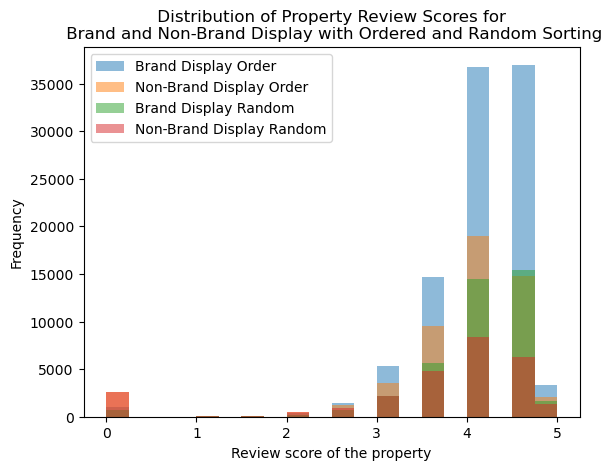

In [18]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['prop_review_score'], bins=20, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['prop_review_score'], bins=20, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['prop_review_score'], bins=20, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['prop_review_score'], bins=20, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Review score of the property')
plt.ylabel('Frequency')
plt.legend()
plt.title(' Distribution of Property Review Scores for \n Brand and Non-Brand Display with Ordered and Random Sorting')

# Show the plot
plt.show()

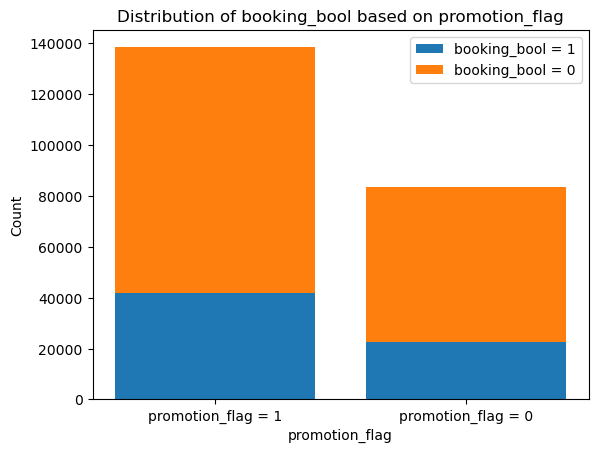

In [19]:
promotion_flag_1 = click_bool_1[click_bool_1['promotion_flag'] == 1]
promotion_flag_0 = click_bool_1[click_bool_1['promotion_flag'] == 0]

promotion_flag_1_book_bool_1 = promotion_flag_1[promotion_flag_1['booking_bool'] == 1]
promotion_flag_1_book_bool_0 = promotion_flag_1[promotion_flag_1['booking_bool'] == 0]

promotion_flag_0_book_bool_1 = promotion_flag_0[promotion_flag_0['booking_bool'] == 1]
promotion_flag_0_book_bool_0 = promotion_flag_0[promotion_flag_0['booking_bool'] == 0]


# Count the occurrences of each value combination
promotion_flag_1_book_bool_1_count = promotion_flag_1_book_bool_1.shape[0]
promotion_flag_1_book_bool_0_count = promotion_flag_1_book_bool_0.shape[0]
promotion_flag_0_book_bool_1_count = promotion_flag_0_book_bool_1.shape[0]
promotion_flag_0_book_bool_0_count = promotion_flag_0_book_bool_0.shape[0]

# Create a list of counts for each value combination
counts = [
    [promotion_flag_1_book_bool_1_count, promotion_flag_1_book_bool_0_count],
    [promotion_flag_0_book_bool_1_count, promotion_flag_0_book_bool_0_count]
]

# Define the labels for the x-axis
labels = ['promotion_flag = 1', 'promotion_flag = 0']

# Define the labels for the legend
legend_labels = ['booking_bool = 1', 'booking_bool = 0']

# Create a stacked bar plot
plt.bar(labels, counts[0], label=legend_labels[0])
plt.bar(labels, counts[1], bottom=counts[0], label=legend_labels[1])

# Customize the plot
plt.xlabel('promotion_flag')
plt.ylabel('Count')
plt.title('Distribution of booking_bool based on promotion_flag')
plt.legend()

# Show the plot
plt.show()


# TASK 3: DATA PREPARATION

In [20]:
def remove_outliers_zscore(df, columns, threshold=0.5):
    # Calculate the z-scores for the specified columns
    z_scores = df[columns].apply(lambda x: (x - x.mean()) / x.std())
    
    # Identify the rows containing outliers based on the threshold
    outlier_rows = z_scores.abs().apply(lambda x: any(abs(val) > threshold for val in x), axis=1)
    
    # Get the outliers and the cleaned DataFrame
    outliers = df[outlier_rows]
    df_cleaned = df[~outlier_rows]
    
    return df_cleaned, outliers

columns = ['price_usd','comp3_rate_percent_diff',
            'comp8_rate_percent_diff','comp5_rate_percent_diff','comp4_rate_percent_diff']

cleaned_df, outliers = remove_outliers_zscore(df, columns, threshold=0.5)


In [ ]:
# to fill the missing value with first quartile
def fill_missing_values_with_first_quartile(df, columns_to_fill):
    # Loop through each column and fill missing values with the first quartile of the respective country
    for column in columns_to_fill:
        # Group the data by country and calculate the first quartile of the column
        first_quartile_by_country = round(df.groupby("prop_country_id")[column].quantile(0.25))
        # Fill missing values in the column with the first quartile of the respective country
        df[column].fillna(df["prop_country_id"].map(first_quartile_by_country), inplace=True)
    
    return df

# Define a list of columns to fill missing values for
columns_to_fill = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score2',
                   'srch_query_affinity_score', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 
                   'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 
                   'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 
                   'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
                   'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
                   'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff']

new_df = fill_missing_values_with_first_quartile(cleaned_df,columns_to_fill)

In [ ]:
new_df.isnull().sum()

In [ ]:
# fill the missing values with forward filling method 
new_df = new_df.fillna(method='ffill')
# check if still some missing values
new_df.isnull().sum()

In [ ]:
# drop the features still have a lot of missing values
new_df=new_df.drop(['gross_bookings_usd'],axis=1)
# new_df=new_df.drop(['comp6_rate','comp6_inv','comp6_rate_percent_diff','gross_bookings_usd'],axis=1)

In [ ]:
# Features engineer
data = new_df
# convert date_time to year, month, day, and hour
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data = data.drop('date_time', axis=1)

# create new features
data['log_price_diff'] = data['prop_log_historical_price'] - np.log(data['price_usd']+1)

data['star_rank'] = data.groupby('visitor_location_country_id')['prop_starrating'].rank(method='dense', ascending=False)

# Calculate average price by country and star rating
avg_price = data.groupby(['prop_country_id', 'prop_starrating'])['price_usd'].transform('mean')
# Calculate price difference and Add price difference as a new feature
data['price_diff'] = data['price_usd'] - avg_price


# To combine the prop_location_score1 and prop_location_score2 columns to create a new feature that captures 
# the overall location score of the hotel, we can simply add these two columns
data['location_score'] = data['prop_location_score1'] + data['prop_location_score2']

print(data.shape)
data.head()

# TASK 4: MODELING AND EVALUATION

# Collaborative Filtering

In [ ]:
# read the test set
test_set = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv', nrows=100 )#, skiprows=range(1, 4400000))


In [ ]:
# get a subset of the training data similar to the query 
def subset_of_data(data,
                   prop_country_id,
                   srch_destination_id,
                   srch_length_of_stay=None,
                   srch_room_count=None,
                   srch_adults_count=None,
                   srch_children_count= None):    
    
    new_df = data[data['prop_country_id'] == prop_country_id]
    new_df1 = new_df[new_df['srch_destination_id'] == srch_destination_id]
    new_df2 = new_df1[new_df1['srch_length_of_stay'] == srch_length_of_stay]
    new_df3 = new_df2[new_df2['srch_room_count'] == srch_room_count]
    new_df4 = new_df3[new_df3['srch_adults_count'] == srch_adults_count]
    new_df5= new_df4[new_df4['srch_children_count'] == srch_children_count]
    return new_df5

In [ ]:
def create_train_matrix(new_df,instance):    
    # Concatenate the dataframes vertically (along the rows)
    new_df = pd.concat([new_df, instance], axis=0)
    # Get unique prop_id values
    unique_props = new_df['prop_id'].unique()

    # Create a new DataFrame with prop_id as columns and srch_id as index
    matrix = pd.DataFrame(0, index=new_df['srch_id'].unique(), columns=unique_props)

    # Fill the matrix with the interaction or rating values
    for _, row in new_df.iterrows():
        srch_id = row['srch_id']
        prop_id = row['prop_id']
    #     rating1 = row['click_bool']  # You can define your own rating metric
        rating = row['click_bool'] + 10 * row['booking_bool'] - (row['price_usd'] / new_df['price_usd'].max()) +\
        + row['prop_review_score']-3 - row['promotion_flag']
        
        matrix.loc[srch_id, prop_id] = rating
    return matrix

In [ ]:
def sum_sort(matrix):
    matrix1 = matrix.sum(axis=0)
    sorted_values = matrix1.sort_values(ascending=False)
    return sorted_values

In [ ]:
def get_instance(data,srch_id):
    instance = data[data['srch_id'] == srch_id].reset_index(drop=True)
    return instance
# instance = get_instance(test_set,srch_id=10)

In [ ]:
with open("/kaggle/working/4700000.csv", "w+") as file:
    file.write("srch_id,prop_id")
    
    for inst in test_set['srch_id'].unique():
        instance = get_instance(test_set,srch_id=inst)
        reco_hotel = None
        for i, row in instance.iterrows():
            test = subset_of_data(data= data,
                                  prop_country_id= row['prop_country_id'],
                                  srch_destination_id= row["srch_destination_id"],
                                  srch_length_of_stay= row['srch_length_of_stay'],
                                   srch_room_count= row['srch_room_count'],
                                 srch_adults_count= row['srch_adults_count'],
                                 srch_children_count= row['srch_children_count']
                                 )
            matrix = create_train_matrix(test,instance)
            reco_hotel = sum_sort(matrix)
            reco_hotel = (reco_hotel.index)
            break

        for i in range(len(instance)):
            
            file.write(f"\n{inst},{reco_hotel[i]}")

# lambda Rank 

In [1]:
data.columns()

NameError: name 'data' is not defined

In [ ]:
features = ['prop_location_score2', 'price_usd', 'promotion_flag']


In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score

# df = pd.read_csv("/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv")
target = 'booking_bool'
train_df, val_df = train_test_split(data, test_size=0.2)
lgb_train = lgb.Dataset(train_df[features], label=train_df[target], group=train_df.groupby('srch_id').size())

params = {
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'ndcg_eval_at': [5],
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': 1
}

gbm = lgb.train(params, lgb_train, num_boost_round=100)
val_pred = gbm.predict(val_df[features])
val_labels = val_df[target]
ndcg = ndcg_score([val_pred], [val_labels], k=5)
print("NDCG@5:", ndcg)


def create_submission_file():
    test_df = pd.read_csv("/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv")
    test_pred = gbm.predict(test_df[features])
    properties_to_rank = test_df[['srch_id', 'prop_id', 'prop_location_score2', 'price_usd', 'promotion_flag']].copy()
    properties_to_rank["score"] = test_pred
    aggregated_scores = properties_to_rank.groupby(['srch_id', 'prop_id'])['score'].mean().reset_index()
    ranked_properties = aggregated_scores.sort_values(['srch_id', 'score'], ascending=[True, False])

    file = open("/kaggle/working/VU-DM-2023-95.csv", "w+")
    file.write("srch_id,prop_id")
    for srch_id, group in ranked_properties.groupby('srch_id'):
        for i, row in group.iterrows():
            file.write(f"\n{srch_id},{int(row['prop_id'])}")